#Lung Cancer Prediction

**Load and Explore the Dataset**

In [1]:
import pandas as pd

# Load the dataset
dataset = '/content/lung_cancer_dataset.csv'
df = pd.read_csv(dataset)

# Display basic information and the first few rows
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [2]:
print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   65        1               1        1              2   
1      F   55        1               2        2              1   
2      F   78        2               2        1              1   
3      M   60        2               1        1              1   
4      F   80        1               1        2              1   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                2        1        2         2                  2         2   
1                1        2        2         2                  1         1   
2                1        2        1         2                  1         1   
3                2        1        2         1                  1         2   
4                1        2        1         2                  1         1   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                    2                      2           

**Preprocess the Data**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Check for missing values
print(df.isnull().sum())

# Encode categorical variables
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])

# Split the data into features and target
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


**Apply Machine Learning Algorithms**

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

01. Logistic Regression

In [6]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, lr_predictions))

Logistic Regression Report:
               precision    recall  f1-score   support

          NO       0.53      0.47      0.50       302
         YES       0.52      0.57      0.54       298

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600



2. Decision Tree Algorithms

In [7]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Report:\n", classification_report(y_test, dt_predictions))

Decision Tree Report:
               precision    recall  f1-score   support

          NO       0.50      0.50      0.50       302
         YES       0.49      0.49      0.49       298

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.49      0.49      0.49       600



3. Random Forest Algorithms

In [8]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, rf_predictions))

Random Forest Report:
               precision    recall  f1-score   support

          NO       0.52      0.49      0.51       302
         YES       0.51      0.53      0.52       298

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600



**Implement Deep Learning Models**

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [10]:
# Build the neural network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming y_train contains "YES" and "NO"
import numpy as np
y_train_encoded = np.where(y_train == "YES", 1, 0)

# Train the model using the encoded labels
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)

# Similarly, encode y_test before evaluation if it contains strings
y_test_encoded = np.where(y_test == "YES", 1, 0)
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Deep Learning Model Accuracy: {accuracy*100:.2f}%")

Epoch 1/50
60/60 [==============================] - 3s 17ms/step - loss: 0.7824 - accuracy: 0.5104 - val_loss: 0.7139 - val_accuracy: 0.4708
Epoch 2/50
60/60 [==============================] - 1s 9ms/step - loss: 0.7283 - accuracy: 0.5266 - val_loss: 0.7061 - val_accuracy: 0.4708
Epoch 3/50
60/60 [==============================] - 1s 10ms/step - loss: 0.7357 - accuracy: 0.4885 - val_loss: 0.6995 - val_accuracy: 0.4958
Epoch 4/50
60/60 [==============================] - 1s 12ms/step - loss: 0.7196 - accuracy: 0.4979 - val_loss: 0.6972 - val_accuracy: 0.4750
Epoch 5/50
60/60 [==============================] - 1s 14ms/step - loss: 0.7080 - accuracy: 0.5068 - val_loss: 0.6951 - val_accuracy: 0.4917
Epoch 6/50
60/60 [==============================] - 0s 6ms/step - loss: 0.7017 - accuracy: 0.5156 - val_loss: 0.6944 - val_accuracy: 0.4917
Epoch 7/50
60/60 [==============================] - 0s 6ms/step - loss: 0.7007 - accuracy: 0.5094 - val_loss: 0.6929 - val_accuracy: 0.5125
Epoch 8/50
60/60

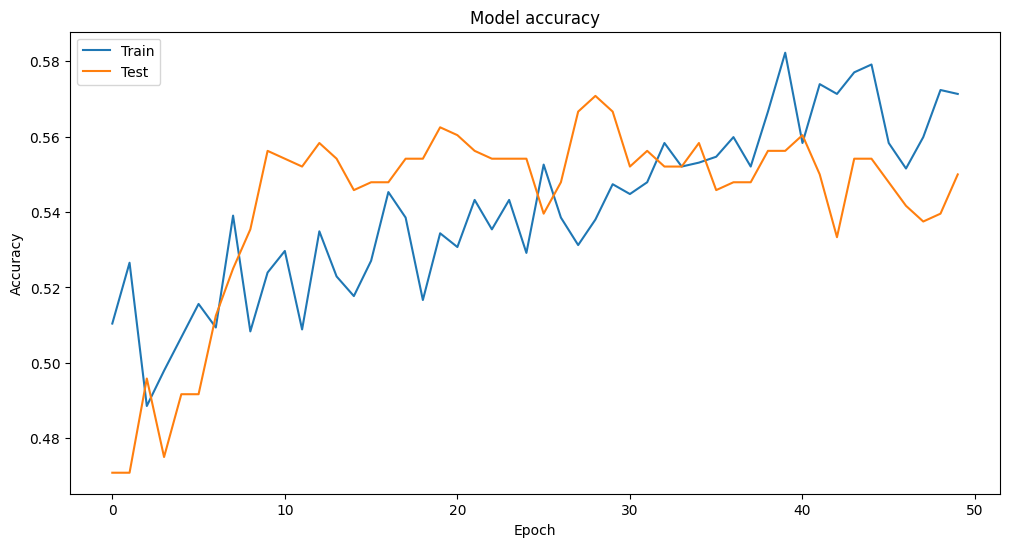

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

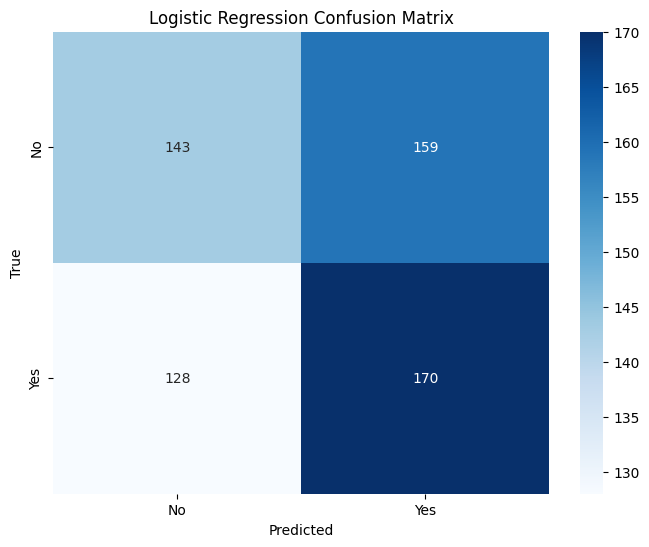

In [16]:
# Plot confusion matrices for each model
plot_confusion_matrix(y_test, lr_predictions, 'Logistic Regression Confusion Matrix')



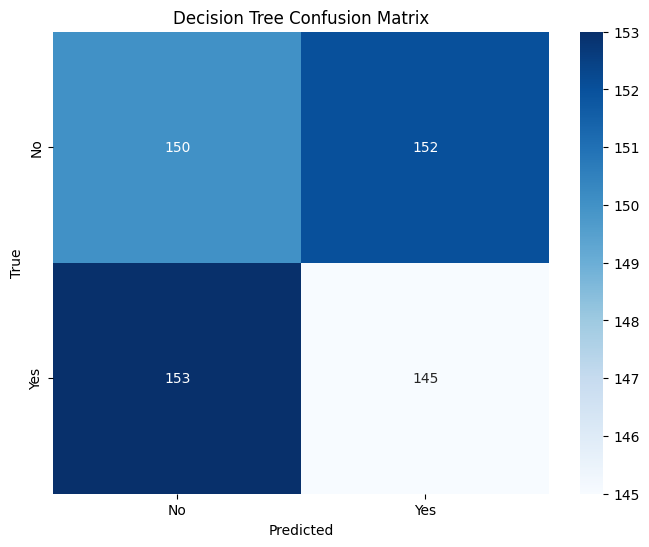

In [17]:
plot_confusion_matrix(y_test, dt_predictions, 'Decision Tree Confusion Matrix')


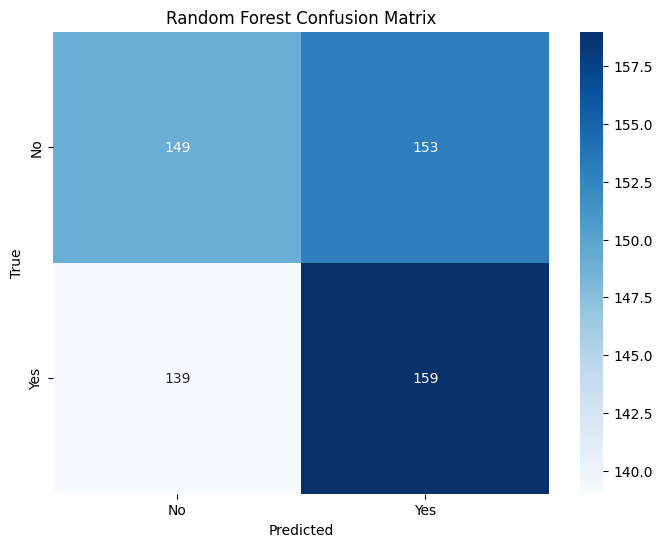

In [18]:
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest Confusion Matrix')

In [19]:
import joblib

# Save the trained model
joblib.dump(lr_model, 'lung_cancer_model.pkl')


['lung_cancer_model.pkl']